# Keras Feed Forward Fully Connected Q8 Classification

In [2]:
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.regularizers import l2

import data_loader

In [5]:
# Hyper params and constants
IMAGE_SIZE = 28

INPUT_SIZE = IMAGE_SIZE * IMAGE_SIZE
HIDDEN_SIZE = 200
OUTPUT_SIZE = 10

LEARNING_RATE = 0.05
ALPHA = 0.0001
EPOCHS = 5
MINIBATCH_SIZE = 5

LOSS='categorical_crossentropy'

# File to save trained model to
SAVE_FILE = "/models/feedforward-q8"

In [6]:
# Load data -- from net_tf.py

path = "data/cullpdb+profile_6133.npy.gz"

train, validation, test = data_loader.load_residues(path)

train_x, train_y = train
vali_x, vali_y = validation
test_x, test_y = test

Loading protein residues and labels...
Loading file from C:\SANJAY\CS\Projects\sdscbio\data\cullpdb+profile_6133.npy.gz...
File Loaded.
Loaded protein residues and labels.


In [7]:
dim = len(train_x[0])
classes = len(train_y[0])
print("Input dimensionality:", dim)
print("Output num classes:", classes)

model = Sequential()

model.add(Dense(HIDDEN_SIZE, init='lecun_uniform', input_dim=dim, W_regularizer=l2(ALPHA)))
model.add(Activation('relu'))
model.add(Dense(classes, init='lecun_uniform', W_regularizer=l2(ALPHA)))
model.add(Activation('sigmoid'))

Input dimensionality: 22
Output num classes 9


In [8]:
# optimizer= takes either string or optimizer object
model.compile(loss=LOSS, optimizer=SGD(lr=LEARNING_RATE), metrics=['accuracy'])

In [11]:
# verbose: 0 for no logging to stdout, 1 for progress bar logging, 2 for one log line per epoch.
hist = model.fit(train_x, train_y, nb_epoch=EPOCHS, batch_size=MINIBATCH_SIZE, 
          validation_data=(vali_x, vali_y), shuffle=True, verbose=2)
print("Done training")

Train on 5600 samples, validate on 256 samples
Epoch 1/5
1s - loss: 0.0227 - acc: 1.0000 - val_loss: 0.0224 - val_acc: 1.0000
Epoch 2/5
1s - loss: 0.0222 - acc: 1.0000 - val_loss: 0.0219 - val_acc: 1.0000
Epoch 3/5
1s - loss: 0.0217 - acc: 1.0000 - val_loss: 0.0214 - val_acc: 1.0000
Epoch 4/5
1s - loss: 0.0212 - acc: 1.0000 - val_loss: 0.0210 - val_acc: 1.0000
Epoch 5/5
1s - loss: 0.0208 - acc: 1.0000 - val_loss: 0.0206 - val_acc: 1.0000
Done training


{'val_loss': [0.029251052263134625, 0.025541972689097747, 0.024319348696735688, 0.023550771555164829, 0.022939992086321581], 'val_acc': [1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [0.23013380625218685, 0.026919598727753121, 0.024866075504438152, 0.023915814709783132, 0.023237038699776998], 'acc': [0.99910714288375202, 1.0, 1.0, 1.0, 1.0]}


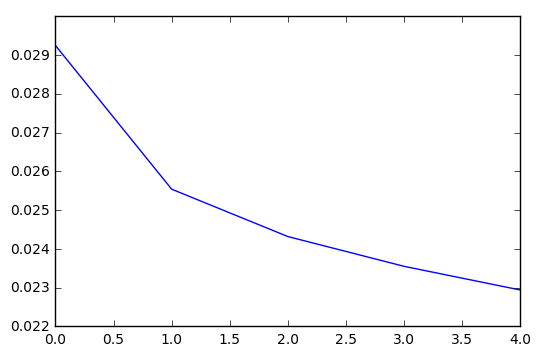

In [10]:
print(hist.history)
validation_loss = list(hist.history.values())[0]
plt.plot(range(EPOCHS), validation_loss)